In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riiid-test-answer-prediction/example_sample_submission.csv
/kaggle/input/riiid-test-answer-prediction/train.csv
/kaggle/input/riiid-test-answer-prediction/example_test.csv
/kaggle/input/riiid-test-answer-prediction/questions.csv
/kaggle/input/riiid-test-answer-prediction/lectures.csv
/kaggle/input/riiid-test-answer-prediction/riiideducation/__init__.py
/kaggle/input/riiid-test-answer-prediction/riiideducation/competition.cpython-37m-x86_64-linux-gnu.so


In [55]:
import riiideducation
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
env = riiideducation.make_env()




Exception: You can only call `make_env()` once.

In [111]:
dir_path = '/kaggle/input/riiid-test-answer-prediction/'
file_train = 'train.csv'
file_questions = 'questions.csv'
file_lectures = 'lectures.csv'

In [82]:
nrows = 100 * 10000
# nrows = None

train = pd.read_csv('/kaggle/input/riiid-test-answer-prediction/train.csv',
                   nrows=nrows, 
                   usecols=[0,1, 2, 3, 4, 5, 6, 7, 8, 9],
                   dtype={'row_id': 'int64',
                          'timestamp': 'int64',
                          'user_id': 'int32',
                          'content_id': 'int16',
                          'content_type_id': 'int8',
                          'task_container_id': 'int8',
                          'user_answer': 'int8',
                          'answered_correctly':'int8',
                          'prior_question_elapsed_time': 'float32',
                          'prior_question_had_explanation': 'str'}
                   )


In [83]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int32  
 3   content_id                      1000000 non-null  int16  
 4   content_type_id                 1000000 non-null  int8   
 5   task_container_id               1000000 non-null  int8   
 6   user_answer                     1000000 non-null  int8   
 7   answered_correctly              1000000 non-null  int8   
 8   prior_question_elapsed_time     976277 non-null   float32
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float32(1), int16(1), int32(1), int64(2), int8(4), object(1)
memory usage: 36.2+ MB


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'label dis')

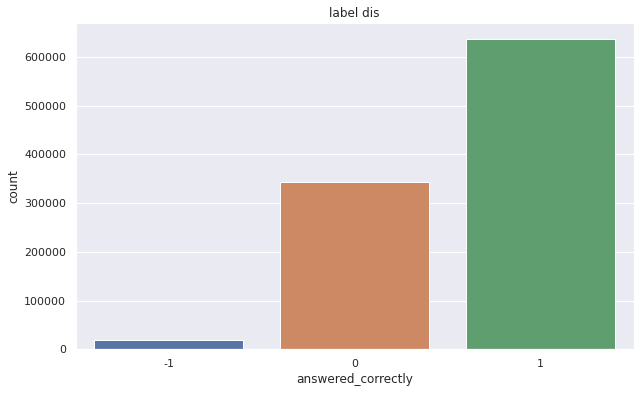

In [86]:
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(data=train,x='answered_correctly')
plt.title("label dis")

In [87]:
train.groupby(["user_id"])["timestamp"].count().reset_index().sort_values(["timestamp"])

,user_id,timestamp
3661,19887248,1
308,1880240,1
2932,15960740,2
366,2148001,2
318,1946295,3
...,...,...
796,4421282,6962
1707,9418512,7482
218,1283420,7569
3329,18122922,7593


In [88]:
train[train["user_id"]==115]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
5,5,157063,115,156,0,5,2,1,5000.0,False
6,6,176092,115,51,0,6,0,1,17000.0,False
7,7,194190,115,50,0,7,3,1,17000.0,False
8,8,212463,115,7896,0,8,2,1,16000.0,False
9,9,230983,115,7863,0,9,0,1,16000.0,False


In [89]:
set(train["prior_question_had_explanation"])

{'False', 'True', nan}

In [90]:
train["prior_question_had_explanation"].value_counts()

True     889887
False    106297
Name: prior_question_had_explanation, dtype: int64

In [91]:
train["prior_question_had_explanation"].head()

0      NaN
1    False
2    False
3    False
4    False
Name: prior_question_had_explanation, dtype: object

In [92]:
map_list={"False":0,"True":1}
train["prior_question_had_explanation"].map(map_list)

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    1.0
999996    1.0
999997    1.0
999998    1.0
999999    1.0
Name: prior_question_had_explanation, Length: 1000000, dtype: float64

In [93]:
from collections import Counter

In [94]:
Counter(train[train["user_id"]==7171715]["content_type_id"])

Counter({0: 10797, 1: 29})

In [95]:
train[(train["user_id"]==7171715)&(train["content_type_id"]==1)]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
371543,371543,22399692,7171715,10742,1,50,-1,-1,NaN,False
371548,371548,22419584,7171715,20590,1,53,-1,-1,NaN,False
371556,371556,22439172,7171715,27204,1,56,-1,-1,NaN,False
371566,371566,22468113,7171715,10688,1,59,-1,-1,NaN,False
371583,371583,22519270,7171715,17519,1,63,-1,-1,NaN,False
371592,371592,22541214,7171715,23716,1,66,-1,-1,NaN,False
371601,371601,22563747,7171715,10032,1,70,-1,-1,NaN,False
371610,371610,22582620,7171715,10217,1,72,-1,-1,NaN,False
372375,372375,27410142,7171715,6081,1,-126,-1,-1,NaN,False
372380,372380,27436782,7171715,22596,1,-124,-1,-1,NaN,False


In [96]:
train.groupby(["user_id"])["answered_correctly"].agg(np.mean).reset_index()

,user_id,answered_correctly
0,115,0.695652
1,124,0.233333
2,2746,0.500000
3,5382,0.632812
4,8623,0.598214
...,...,...
3819,20913319,0.560096
3820,20913864,0.333333
3821,20938253,0.575701
3822,20948951,0.607843


In [97]:
np.mean(train[train["user_id"]==115]["answered_correctly"])

0.6956521739130435

In [98]:
d=train.groupby(["user_id"])["answered_correctly"].agg([np.mean]).reset_index()
d[d["user_id"]==115]

,user_id,mean
0,115,0.695652


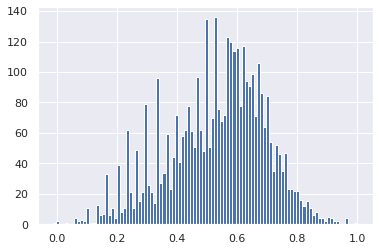

In [99]:
d["mean"].hist(bins=100)

In [100]:
#对只有一个数据或者数据过少的用户进行一个标签的平滑

def get_rate(x,b=20):
    #1/(x+b)
    return np.sum(x)/(np.size(x)+b)
train.groupby(["user_id"])["answered_correctly"].agg(lambda x:get_rate(x,b=20))


user_id
115         0.484848
124         0.140000
2746        0.250000
5382        0.547297
8623        0.507576
              ...   
20913319    0.534404
20913864    0.170732
20938253    0.554955
20948951    0.436620
20949024    0.220588
Name: answered_correctly, Length: 3824, dtype: float64

*用户行为次数分布*

Text(0, 0.5, 'Pro')

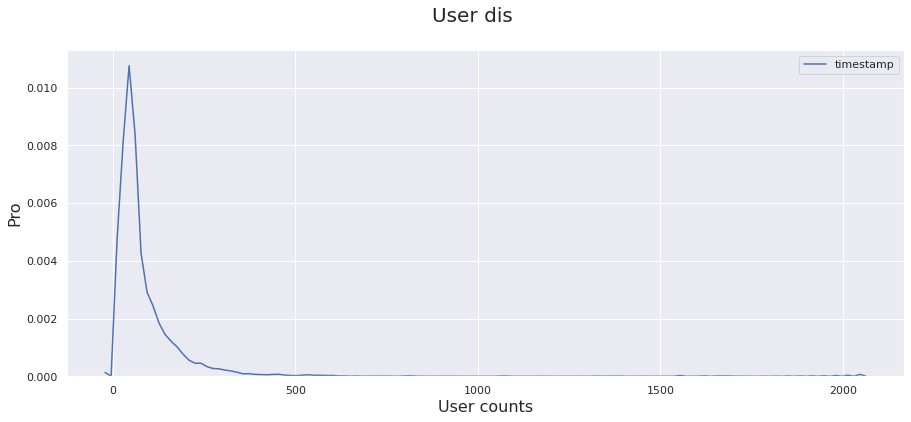

In [101]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["content_id"])["timestamp"].count())
fig.figure.suptitle("User dis",fontsize=20)
plt.xlabel("User counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)

Text(0, 0.5, 'Pro')

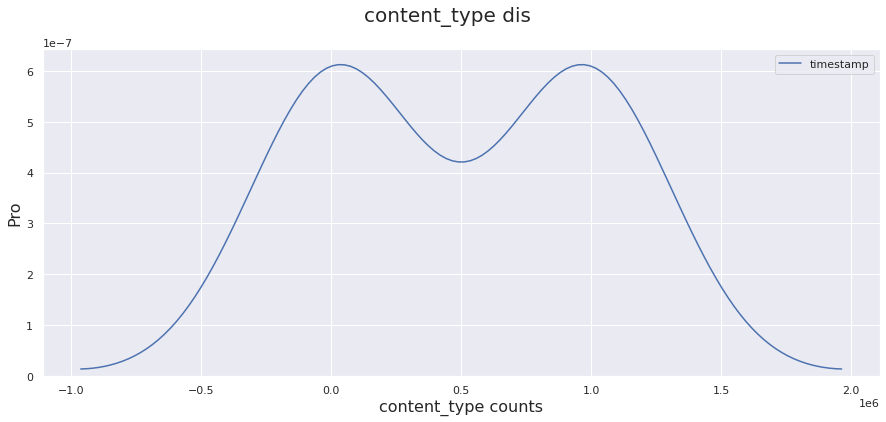

In [102]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["content_type_id"])["timestamp"].count())
fig.figure.suptitle("content_type dis",fontsize=20)
plt.xlabel("content_type counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)


Text(0, 0.5, 'Pro')

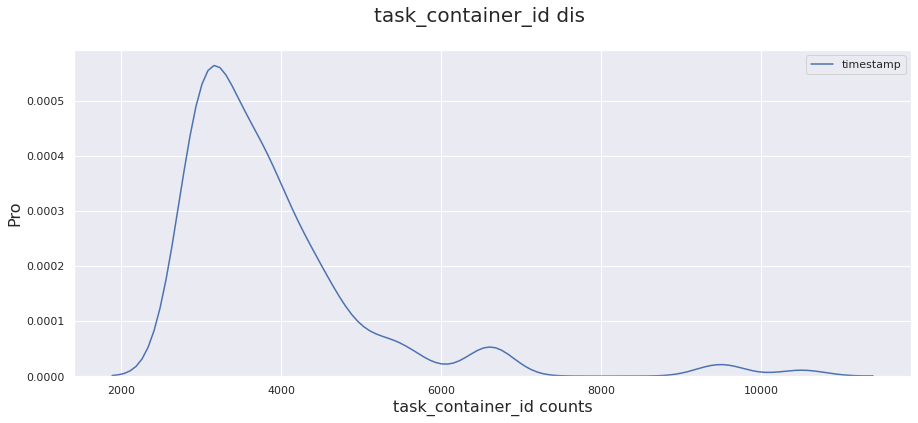

In [103]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["task_container_id"])["timestamp"].count())
fig.figure.suptitle("task_container_id dis",fontsize=20)
plt.xlabel("task_container_id counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)

Text(0, 0.5, 'Pro')

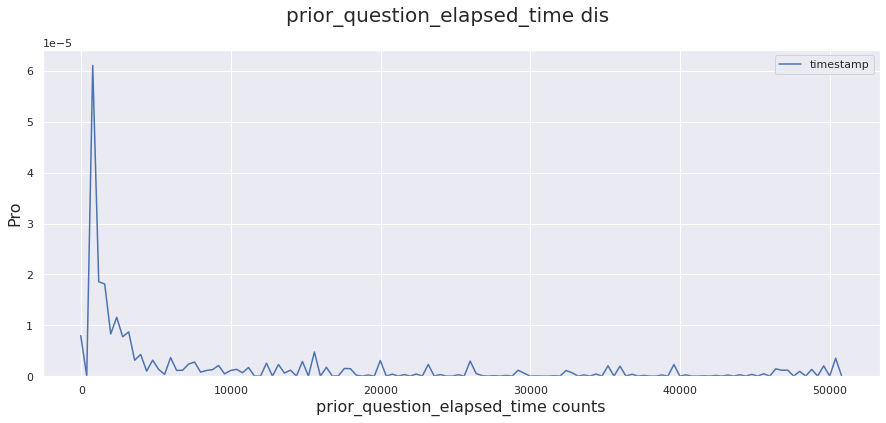

In [104]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["prior_question_elapsed_time"])["timestamp"].count())
fig.figure.suptitle("prior_question_elapsed_time dis",fontsize=20)
plt.xlabel("prior_question_elapsed_time counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)


Text(0, 0.5, 'Pro')

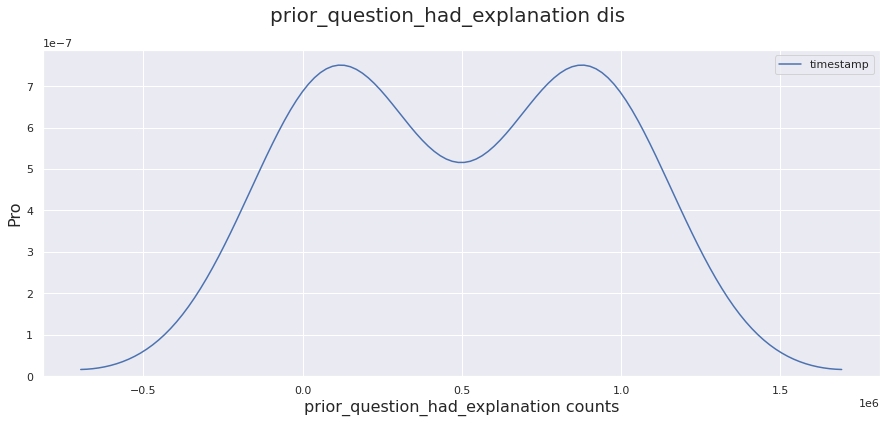

In [105]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["prior_question_had_explanation"])["timestamp"].count())
fig.figure.suptitle("prior_question_had_explanation dis",fontsize=20)
plt.xlabel("prior_question_had_explanation counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)


Text(0, 0.5, 'Pro')

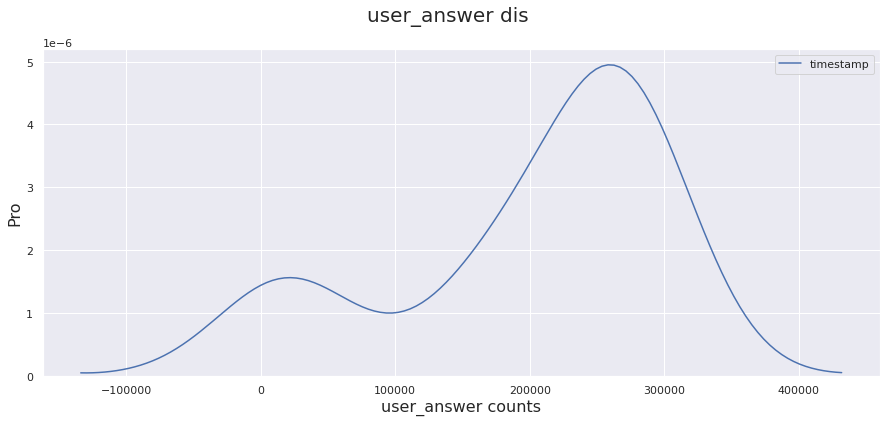

In [106]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["user_answer"])["timestamp"].count())
fig.figure.suptitle("user_answer dis",fontsize=20)
plt.xlabel("user_answer counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)

Text(0, 0.5, 'Pro')

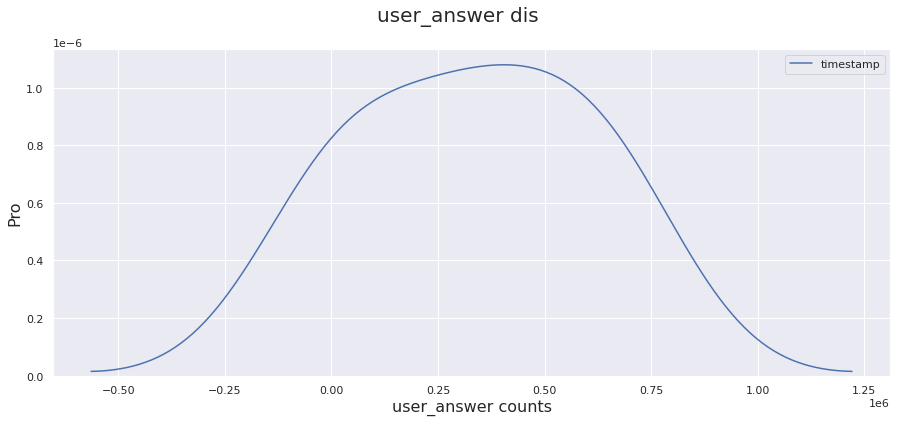

In [107]:
sns.set()
fig=plt.figure(figsize=(15,6))
fig=sns.kdeplot(train.groupby(["answered_correctly"])["timestamp"].count())
fig.figure.suptitle("user_answer dis",fontsize=20)
plt.xlabel("user_answer counts",fontsize=16)
plt.ylabel("Pro",fontsize=16)

# **查看数据类型情况**

In [39]:
for columns in train.columns:
    print("columns:",columns)
    print(train[columns].value_counts())
    print()

columns: timestamp
0              3847
835816            8
710382            8
846304            8
151868            7
               ... 
1658113596        1
40435030777       1
618496762         1
4578972408        1
4573904904        1
Name: timestamp, Length: 769357, dtype: int64

columns: user_id
7171715     10826
18122922     7593
1283420      7569
9418512      7482
4421282      6962
            ...  
1946295         3
2148001         2
15960740        2
19887248        1
1880240         1
Name: user_id, Length: 3824, dtype: int64

columns: content_id
6116     2041
6173     1978
4120     1924
175      1877
7876     1847
         ... 
12960       1
12378       1
12893       1
12961       1
13165       1
Name: content_id, Length: 13320, dtype: int64

columns: content_type_id
0    980093
1     19907
Name: content_type_id, dtype: int64

columns: task_container_id
 14    10526
 15    10487
 4      9571
 5      9502
 6      9481
       ...  
-11     2780
-5      2762
-2      2761
-1   

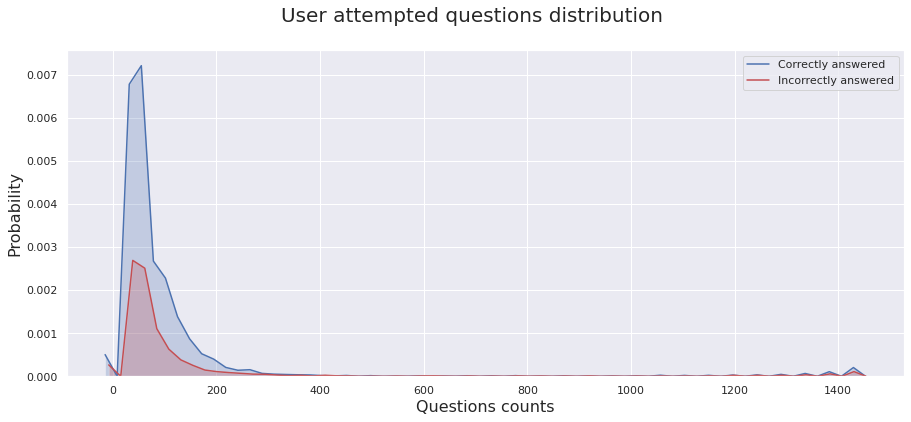

In [159]:

## 问答特征分析
df = train[train['content_type_id'] == 0]

df2 = df[df['answered_correctly'] == 1]
df3 = df[df['answered_correctly'] == 0]

df2 = df2.groupby(by='content_id').count()
df3 = df3.groupby(by='content_id').count()

fig = plt.figure(figsize=(15,6))
fig = sns.kdeplot(df2['row_id'], shade=True, gridsize=50, color='b', legend=False)
fig = sns.kdeplot(df3['row_id'], shade=True, gridsize=50, color='r', legend=False)

fig.figure.suptitle("User attempted questions distribution", fontsize = 20)
plt.xlabel('Questions counts', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(['Correctly answered','Incorrectly answered'])

In [160]:
df2.groupby(by='content_id').count()

,row_id,timestamp,user_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
content_id,,,,,,,,
0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
13518,1,1,1,1,1,1,1,1
13519,1,1,1,1,1,1,1,1
13520,1,1,1,1,1,1,1,1


In [112]:
# 分析问答数据
#%%
questions = pd.read_csv(
                        dir_path + file_questions, 
                        nrows=nrows,
                        usecols=['question_id','bundle_id','part','tags'], 
                        dtype={
                           'question_id': 'int16',
                           'bundle_id': 'int16',
                           'part': 'int8',
                           'tags': 'str'
                       }
                    )

In [113]:
questions.head()

,question_id,bundle_id,part,tags
0,0,0,1,51 131 162 38
1,1,1,1,131 36 81
2,2,2,1,131 101 162 92
3,3,3,1,131 149 162 29
4,4,4,1,131 5 162 38


In [114]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  13523 non-null  int16 
 1   bundle_id    13523 non-null  int16 
 2   part         13523 non-null  int8  
 3   tags         13522 non-null  object
dtypes: int16(2), int8(1), object(1)
memory usage: 171.8+ KB


In [115]:
set(questions.bundle_id)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [116]:

from collections import Counter

Counter(questions.bundle_id)

Counter({0: 1,
         1: 1,
         2: 1,
         3: 1,
         4: 1,
         5: 1,
         6: 1,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         24: 1,
         25: 1,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         34: 1,
         35: 1,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 1,
         45: 1,
         46: 1,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1,
         55: 1,
         56: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         61: 1,
         62: 1,
  

In [117]:

Counter(questions.part)

Counter({1: 992, 2: 1647, 3: 1562, 4: 1439, 5: 5511, 6: 1212, 7: 1160})

In [120]:
#one_hot 处理
questions['part_1'] = questions['part'].map(lambda x: 1 if x==1 else 0)
questions['part_2'] = questions['part'].map(lambda x: 1 if x==2 else 0)


In [121]:

questions['part_1']


0        1
1        1
2        1
3        1
4        1
        ..
13518    0
13519    0
13520    0
13521    0
13522    0
Name: part_1, Length: 13523, dtype: int64

In [122]:
questions.tags

0         51 131 162 38
1             131 36 81
2        131 101 162 92
3        131 149 162 29
4          131 5 162 38
              ...      
13518                14
13519                 8
13520                73
13521               125
13522                55
Name: tags, Length: 13523, dtype: object

In [123]:
questions.tags.map(lambda x: str(x).split(' '))

0         [51, 131, 162, 38]
1              [131, 36, 81]
2        [131, 101, 162, 92]
3        [131, 149, 162, 29]
4          [131, 5, 162, 38]
                ...         
13518                   [14]
13519                    [8]
13520                   [73]
13521                  [125]
13522                   [55]
Name: tags, Length: 13523, dtype: object

In [125]:
questions['tags_51'] = questions['tags'].map(lambda x: 1 if '51' in str(x) else 0 )
questions['tags_51'] 

0        1
1        0
2        0
3        0
4        0
        ..
13518    0
13519    0
13520    0
13521    0
13522    0
Name: tags_51, Length: 13523, dtype: int64

In [126]:
questions

,question_id,bundle_id,part,tags,part_1,part_2,tags_51
0,0,0,1,51 131 162 38,1,0,1
1,1,1,1,131 36 81,1,0,0
2,2,2,1,131 101 162 92,1,0,0
3,3,3,1,131 149 162 29,1,0,0
4,4,4,1,131 5 162 38,1,0,0
...,...,...,...,...,...,...,...
13518,13518,13518,5,14,0,0,0
13519,13519,13519,5,8,0,0,0
13520,13520,13520,5,73,0,0,0
13521,13521,13521,5,125,0,0,0


In [131]:
tags_list = []
for c in questions.tags.map(lambda x: str(x).split(' ')):
    tags_list += c
Counter(tags_list)

Counter({'51': 71,
         '131': 650,
         '162': 914,
         '38': 2256,
         '36': 35,
         '81': 1969,
         '101': 52,
         '92': 2269,
         '149': 53,
         '29': 1707,
         '5': 85,
         '10': 293,
         '94': 27,
         '61': 49,
         '110': 49,
         '13': 24,
         '164': 56,
         '99': 36,
         '93': 58,
         '70': 46,
         '9': 124,
         '104': 72,
         '40': 27,
         '130': 37,
         '187': 45,
         '102': 789,
         '111': 38,
         '178': 39,
         '143': 712,
         '30': 105,
         '90': 214,
         '100': 203,
         '176': 105,
         '140': 112,
         '6': 8,
         '2': 144,
         '107': 120,
         '114': 121,
         '138': 104,
         '41': 100,
         '141': 65,
         '137': 115,
         '142': 17,
         '119': 93,
         '148': 110,
         '69': 69,
         '62': 194,
         '155': 209,
         '163': 132,
         '129': 50,

In [129]:
len(set(tags_list)

{'0',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',


In [132]:
# 分析讲课数据

lectures = pd.read_csv(
                       dir_path + file_lectures, 
                       usecols=['lecture_id','tag','part','type_of'], 
                       nrows=nrows,
                       dtype={
                           'lecture_id': 'int16',
                           'tag': 'int16',
                           'part': 'int8',
                           'type_of': 'str'
                       }
                    )


In [133]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [134]:
lectures.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


In [135]:
Counter(lectures.part)

Counter({5: 143, 1: 54, 6: 83, 2: 56, 7: 32, 3: 19, 4: 31})

In [136]:
Counter(lectures.tag)

Counter({159: 4,
         70: 5,
         45: 3,
         79: 4,
         156: 4,
         114: 5,
         179: 4,
         134: 6,
         93: 2,
         80: 3,
         98: 3,
         101: 4,
         33: 3,
         74: 6,
         60: 3,
         181: 4,
         43: 3,
         4: 4,
         109: 4,
         89: 3,
         142: 2,
         140: 2,
         104: 2,
         1: 4,
         65: 3,
         155: 1,
         26: 4,
         178: 2,
         173: 5,
         7: 3,
         147: 2,
         171: 1,
         78: 2,
         62: 6,
         64: 4,
         141: 3,
         124: 2,
         161: 6,
         24: 2,
         23: 2,
         152: 4,
         8: 4,
         94: 5,
         119: 5,
         37: 2,
         177: 3,
         54: 3,
         157: 4,
         132: 2,
         6: 2,
         67: 1,
         123: 3,
         50: 2,
         25: 3,
         175: 2,
         116: 6,
         136: 7,
         20: 2,
         129: 3,
         127: 3,
         53: 4,

In [137]:
Counter(lectures.type_of)

Counter({'concept': 222,
         'solving question': 186,
         'intention': 7,
         'starter': 3})

# **测试集分析**

In [139]:
iter_test = env.iter_test()


In [140]:
from collections import Counter
import pandas as pd
#%%
test_user_id_list = []
test_df_list = []
#%%
# (test_df, sample_prediction_df) = next(iter_test)
#%%
for index, (test_df, sample_prediction_df) in enumerate(iter_test):
    test_df_list += [test_df]
    test_user_id_list += list(test_df['user_id'])
    test_df['answered_correctly'] = 0.5
    env.predict(test_df.loc[test_df['content_type_id'] == 0, ['row_id', 'answered_correctly']])
    print('index : ', index, 'test_df len : ', len(test_df))


index :  0 test_df len :  18
index :  1 test_df len :  27
index :  2 test_df len :  26
index :  3 test_df len :  33


In [141]:
Counter(test_user_id_list)

Counter({275030867: 4,
         554169193: 3,
         1720860329: 2,
         288641214: 4,
         1728340777: 2,
         1364159702: 2,
         1521618396: 2,
         1317245193: 4,
         1700555100: 1,
         998511398: 3,
         1422853669: 3,
         1096784725: 4,
         385471210: 2,
         1202386221: 4,
         2018567473: 3,
         1233875513: 3,
         891955351: 2,
         1981166446: 3,
         1637273633: 2,
         2030979309: 3,
         319060572: 4,
         98059812: 2,
         674533997: 3,
         555691277: 3,
         775113212: 4,
         1219481379: 1,
         1148874033: 1,
         1281335472: 1,
         2002570769: 1,
         706626847: 1,
         1357500007: 4,
         1599808246: 1,
         1305988022: 1,
         1310228392: 5,
         2093197291: 1,
         1468996389: 3,
         1838324752: 1,
         2103436554: 3,
         311890082: 3,
         1817433235: 1,
         1900527744: 3,
         7792299: 1})

In [142]:
len(test_user_id_list)

104

In [144]:
test_df_all = pd.concat(test_df_list,axis=0)
test_df_all.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses,answered_correctly
group_num,,,,,,,,,,,
0,0,0,275030867,5729,0,0,NaN,<NA>,[],[],0.5
0,1,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN,0.5
0,2,4213672059,1720860329,457,0,240,17000.0,True,NaN,NaN,0.5
0,3,62798072960,288641214,13262,0,266,23000.0,True,NaN,NaN,0.5
0,4,10585422061,1728340777,6119,0,162,72400.0,True,NaN,NaN,0.5
0,5,18020362258,1364159702,12023,0,4424,18000.0,True,NaN,NaN,0.5
0,6,2325432079,1521618396,574,0,1367,18000.0,True,NaN,NaN,0.5
0,7,39456940781,1317245193,12043,0,5314,17000.0,True,NaN,NaN,0.5
0,8,3460555189,1700555100,7910,0,532,21000.0,True,NaN,NaN,0.5


In [145]:
#%%
test_df_all[test_df_all['user_id']==288641214]
#%%
test_df_all[test_df_all['user_id']==674533997]
#%%
test_df_all[test_df_all['user_id']==1310228392]
#%%


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses,answered_correctly
group_num,,,,,,,,,,,
3,76,48613916248,1310228392,11869,0,1458,26333.0,True,NaN,NaN,0.5
3,77,48613916248,1310228392,11871,0,1458,26333.0,True,NaN,NaN,0.5
3,78,48613916248,1310228392,11870,0,1458,26333.0,True,NaN,NaN,0.5
3,79,48613916248,1310228392,11872,0,1458,26333.0,True,NaN,NaN,0.5
3,80,48613916248,1310228392,11868,0,1458,26333.0,True,NaN,NaN,0.5


In [155]:
train.groupby(['user_id'])['timestamp'].rank()

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
          ... 
999995    44.0
999996    45.0
999997    46.0
999998    47.0
999999    48.0
Name: timestamp, Length: 1000000, dtype: float64

In [ ]:
# 用户数据基本建模
#%%
dir_path = '/kaggle/input/riiid-test-answer-prediction/'
file_train = 'train.csv'
file_questions = 'questions.csv'
#%%
nrows =  100 * 10000
# nrows = None
#%%
train = pd.read_csv(
                    dir_path + file_train, 
                    nrows=nrows, 
                    usecols=['row_id', 'timestamp', 'user_id', 'content_id', 
                             'content_type_id', 'task_container_id', 'answered_correctly',
                            'prior_question_elapsed_time','prior_question_had_explanation'],
                    dtype={
                            'row_id': 'int64',
                            'timestamp': 'int64',
                            'user_id': 'int32',
                            'content_id': 'int16',
                            'content_type_id': 'int8',
                            'task_container_id': 'int8',
                            'answered_correctly': 'int8',
                            'prior_question_elapsed_time': 'float32',
                            'prior_question_had_explanation': 'str'
                        }
                   )
#%%
train[train['user_id']==115]

# **开始baseline特征工程和训练**

In [ ]:
nrows = None
train = pd.read_csv('/kaggle/input/riiid-test-answer-prediction/train.csv',
                   nrows=nrows, 
                   usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9],
                   dtype={'timestamp': 'int64',
                          'user_id': 'int32',
                          'content_id': 'int16',
                          'content_type_id': 'int8',
                          'task_container_id': 'int8',
                          'user_answer': 'int8',
                          'answered_correctly':'int8',
                          'prior_question_elapsed_time': 'float32',
                          'prior_question_had_explanation': 'boolean'}
                   )


In [ ]:
#先选出回答问题的人
train = train[train.content_type_id == False]

train = train.sort_values(['timestamp'], ascending=True).reset_index(drop = True)
train


In [ ]:
#某题目的用户回答正确与否的一些普通统计特征（题目的难度）
results_c_final = train[['content_id','answered_correctly']].groupby(['content_id']).agg(['mean','sum','count','std'])
results_c_final.columns = ["content_y_mean","content_y_sum","content_y_count","content_y_std"]
#用户自身的回答正确与否的一些普通统计特征（用户回答题目的难度）
results_u_final = train[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count','std'])
results_u_final.columns = ['user_y_mean', 'user_y_sum', 'user_y_count','user_y_std']
#某题目的上个题目平均时间的一些普通统计特征（在此现在的问题情况下，回答上某个题目的所用时间）
results_ct_final = train[['content_id','prior_question_elapsed_time']].groupby(['content_id']).agg(['mean', 'sum', 'count','std'])
results_ct_final.columns = ['content_t_mean', 'content_t_sum', 'content_t_count','content_t_std']
#用户的上个题目平均时间的一些普通统计特征（用户用回答上某个个题目的所用时间）
results_ut_final = train[['user_id','prior_question_elapsed_time']].groupby(['user_id']).agg(['mean', 'sum', 'count','std'])
results_ut_final.columns = ['user_t_mean', 'user_t_sum', 'user_t_count','user_t_std']

train.drop(['timestamp', 'content_type_id'], axis=1, inplace=True)


validation = pd.DataFrame()

#选出用户的后10个数据作为验证集数据
for i in range(10):
    last_records = train.drop_duplicates('user_id', keep = 'last')
    train = train[~train.index.isin(last_records.index)]
    validation = validation.append(last_records)
    print('validation : ', i)


X = pd.DataFrame()

#选出用户的后60个数据作为验证集数据
for i in range(60):
    last_records = train.drop_duplicates('user_id', keep = 'last')
    train = train[~train.index.isin(last_records.index)]
    X = X.append(last_records)
    print('X : ', i)

#这是去掉用户的后70个数据的统计特征
results_c_tv = train[['content_id','answered_correctly']].groupby(['content_id']).agg(['mean','sum','count','std'])
results_c_tv.columns = ["content_y_mean","content_y_sum","content_y_count","content_y_std"]

results_u_tv = train[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count','std'])
results_u_tv.columns = ['user_y_mean', 'user_y_sum', 'user_y_count','user_y_std']

results_ct_tv = train[['content_id','prior_question_elapsed_time']].groupby(['content_id']).agg(['mean', 'sum', 'count','std'])
results_ct_tv.columns = ['content_t_mean', 'content_t_sum', 'content_t_count','content_t_std']

results_ut_tv = train[['user_id','prior_question_elapsed_time']].groupby(['user_id']).agg(['mean', 'sum', 'count','std'])
results_ut_tv.columns = ['user_t_mean', 'user_t_sum', 'user_t_count','user_t_std']

del(train)
#训练集
X = pd.merge(X, results_u_tv, on=['user_id'], how="left")
print(X.columns)
X = pd.merge(X, results_c_tv, on=['content_id'], how="left")
print(X.columns)
X = pd.merge(X, results_ut_tv, on=['user_id'], how="left")
print(X.columns)
X = pd.merge(X, results_ct_tv, on=['content_id'], how="left")
print(X.columns)
#验证集
validation = pd.merge(validation, results_u_tv, on=['user_id'], how="left")
validation = pd.merge(validation, results_c_tv, on=['content_id'], how="left")
validation = pd.merge(validation, results_ut_tv, on=['user_id'], how="left")
validation = pd.merge(validation, results_ct_tv, on=['content_id'], how="left")



In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

X.prior_question_had_explanation.fillna(False, inplace = True)
validation.prior_question_had_explanation.fillna(False, inplace = True)

validation["prior_question_had_explanation_enc"] = lb_make.fit_transform(validation["prior_question_had_explanation"])
X["prior_question_had_explanation_enc"] = lb_make.fit_transform(X["prior_question_had_explanation"])

y = X['answered_correctly']
X = X.drop(['answered_correctly'], axis=1)

y_val = validation['answered_correctly']
X_val = validation.drop(['answered_correctly'], axis=1)

# X.columns

columns_features = [c for c in X.columns if c not in ['user_id','content_id','prior_question_had_explanation']]

X = X[columns_features]
X_val = X_val[columns_features]

X.fillna(-1,  inplace=True)
X_val.fillna(-1, inplace=True)



In [ ]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X, y)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
params = {
    'objective': 'binary',
    'max_bin': 600,
    'learning_rate': 0.02,
    'num_leaves': 80
}

In [ ]:
model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    verbose_eval=25,
    num_boost_round=10000,
    early_stopping_rounds=10
)


y_pred = model.predict(X_val)
y_true = np.array(y_val)
roc_auc_score(y_true, y_pred)

In [ ]:

iter_test = env.iter_test()

for (test_df, sample_prediction_df) in iter_test:
	test_df = pd.merge(test_df, results_u_final, on=['user_id'],  how="left")
	test_df = pd.merge(test_df, results_c_final, on=['content_id'],  how="left")
	test_df = pd.merge(test_df, results_ut_final, on=['user_id'],  how="left")
	test_df = pd.merge(test_df, results_ct_final, on=['content_id'],  how="left")

    test_df['prior_question_had_explanation'].fillna(False, inplace=True)
    test_df["prior_question_had_explanation_enc"] = lb_make.fit_transform(test_df["prior_question_had_explanation"])

    X_test = test_df[columns_features]
    X_test.fillna(-1, inplace=True)

    test_df['answered_correctly'] =  model.predict(X_test)
    env.predict(test_df.loc[test_df['content_type_id'] == 0, ['row_id', 'answered_correctly']])
